<a href="https://colab.research.google.com/github/RiteshopShrivastava/TextMining/blob/main/Assignment_TextMining_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Text Mining**

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

**Amazon Reviews - Apple iPhone 7 (32GB) - Black**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from matplotlib.pyplot import imread
import string
import spacy
from wordcloud import WordCloud
#%matplotlib inline

In [45]:
# Read the data
amazon_reviews = pd.read_csv('/content/Amazon_reviews.csv',encoding="latin-1")
amazon_reviews.head()

,Unnamed: 0,Customer_name,Title,Rating,Review
0,0,jaywant,Defective Iphone 7,1.0 out of 5 stars,i received defective iphone 7 32GB silver co...
1,1,Bharath Kumar,Switch to iPhone,5.0 out of 5 stars,Thanks for Amazon service. phone is very nic...
2,2,Utpal Das,"Now I know why people use an iPhone, especiall...",5.0 out of 5 stars,"Redmi phones cameras are great, of course iP..."
3,3,Rishabh,Black Beauty !!,5.0 out of 5 stars,If you are an apple fan !! This is a true be...
4,4,zishan ali,Worst battery in expensive iphone,1.0 out of 5 stars,in 20 days i found my battery health 98% whi...


In [7]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     50 non-null     int64 
 1   Customer_name  50 non-null     object
 2   Title          50 non-null     object
 3   Rating         50 non-null     object
 4   Review         50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [46]:
# remove both the leading and the trailing characters
amazon_reviews = [Review.strip() for Review in amazon_reviews.Review]

In [47]:
# removing empty strings
amazon_reviews = [x for x in amazon_reviews if x]
amazon_reviews[0:10]

['i received defective iphone 7 32GB silver colour during "Great Indian Festival Sale 2018".Amazon delivered the product in a Day.But Product seems to be non functional. as Rear camera get Freeze due to faulty camera sensor. Just to save the time & money, i bought it from Amazon online E-store. Now Amazon representative, asked me to visit Apple Service store. So far i have wasted my precious time & my mind . The phone was sold by "Sold by Appario Retail Private Ltd " .I\'m really fed up till now. expecting Amazon to do quick action against it.',
 'Thanks for Amazon service. phone is very nice and cool also is the display was very very cool the sound clarity is excellent and phone is very slim. And the processor is very fast Nice performance in gaming. Compare to other phones this is superb.',
 'Redmi phones cameras are great, of course iPhone is better but is the 6 more Redmi phones that I can get for 1 iPhone justifiable for such a difference in price? Well, absolutely yes.iPhone came

In [50]:
amazon_reviews_wordcloud = ' '.join(amazon_reviews)

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
# Tokenizing based on sentences (wherever fullstop considers new sentence)
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(amazon_reviews))
sentences[0:10]

['i received defective iphone 7 32GB silver colour during "Great Indian Festival Sale 2018".Amazon delivered the product in a Day.But Product seems to be non functional.',
 'as Rear camera get Freeze due to faulty camera sensor.',
 'Just to save the time & money, i bought it from Amazon online E-store.',
 'Now Amazon representative, asked me to visit Apple Service store.',
 'So far i have wasted my precious time & my mind .',
 'The phone was sold by "Sold by Appario Retail Private Ltd " .I\'m really fed up till now.',
 'expecting Amazon to do quick action against it.',
 'Thanks for Amazon service.',
 'phone is very nice and cool also is the display was very very cool the sound clarity is excellent and phone is very slim.',
 'And the processor is very fast Nice performance in gaming.']

In [15]:
# Converting tokenized sentences into Dataframe
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,i received defective iphone 7 32GB silver colo...
1,as Rear camera get Freeze due to faulty camera...
2,"Just to save the time & money, i bought it fro..."
3,"Now Amazon representative, asked me to visit A..."
4,So far i have wasted my precious time & my mind .
...,...
213,They are asking me to reach out to Apple care.
214,Still no luck.
215,"After multiple attempts, product got replaced."
216,Now itâs working fine.


In [16]:
# Stopword removal
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
sent_df['no_stop_sentence'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [19]:
sent_df

,sentence,no_stop_sentence
0,i received defective iphone 7 32GB silver colo...,received defective iphone 7 32GB silver colour...
1,as Rear camera get Freeze due to faulty camera...,Rear camera get Freeze due faulty camera sensor.
2,"Just to save the time & money, i bought it fro...","Just save time & money, bought Amazon online E..."
3,"Now Amazon representative, asked me to visit A...","Now Amazon representative, asked visit Apple S..."
4,So far i have wasted my precious time & my mind .,So far wasted precious time & mind .
...,...,...
213,They are asking me to reach out to Apple care.,They asking reach Apple care.
214,Still no luck.,Still luck.
215,"After multiple attempts, product got replaced.","After multiple attempts, product got replaced."
216,Now itâs working fine.,Now itâs working fine.


In [20]:
#removing punctuations
sent_df['clean'] = sent_df['no_stop_sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [21]:
sent_df

,sentence,no_stop_sentence,clean
0,i received defective iphone 7 32GB silver colo...,received defective iphone 7 32GB silver colour...,received defective iphone 7 32GB silver colour...
1,as Rear camera get Freeze due to faulty camera...,Rear camera get Freeze due faulty camera sensor.,Rear camera get Freeze due faulty camera sensor.
2,"Just to save the time & money, i bought it fro...","Just save time & money, bought Amazon online E...","Just save time money, bought Amazon online E-s..."
3,"Now Amazon representative, asked me to visit A...","Now Amazon representative, asked visit Apple S...","Now Amazon representative, asked visit Apple S..."
4,So far i have wasted my precious time & my mind .,So far wasted precious time & mind .,So far wasted precious time mind
...,...,...,...
213,They are asking me to reach out to Apple care.,They asking reach Apple care.,They asking reach Apple care.
214,Still no luck.,Still luck.,Still luck.
215,"After multiple attempts, product got replaced.","After multiple attempts, product got replaced.","After multiple attempts, product got replaced."
216,Now itâs working fine.,Now itâs working fine.,Now itâs working fine.


In [22]:
sent_df=sent_df.drop(['sentence','no_stop_sentence'],axis=1)

In [23]:
sent_df

,clean
0,received defective iphone 7 32GB silver colour...
1,Rear camera get Freeze due faulty camera sensor.
2,"Just save time money, bought Amazon online E-s..."
3,"Now Amazon representative, asked visit Apple S..."
4,So far wasted precious time mind
...,...
213,They asking reach Apple care.
214,Still luck.
215,"After multiple attempts, product got replaced."
216,Now itâs working fine.


In [24]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [25]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [26]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [ ]:
affinity_scores

In [28]:
#Custom function :score each word in a sentence in lemmatised form, but calculate the score for the whole sentence.

nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [29]:
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)

In [30]:
sent_df

,clean,sentiment_value
0,received defective iphone 7 32GB silver colour...,0
1,Rear camera get Freeze due faulty camera sensor.,0
2,"Just save time money, bought Amazon online E-s...",2
3,"Now Amazon representative, asked visit Apple S...",0
4,So far wasted precious time mind,-1
...,...,...
213,They asking reach Apple care.,3
214,Still luck.,3
215,"After multiple attempts, product got replaced.",0
216,Now itâs working fine.,2


In [31]:
#word count for "clean"column
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0    19
1     8
2     8
3     8
4     6
5    13
6     5
7     3
8    11
9     6
Name: word_count, dtype: int64

In [32]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count
75,"Â Packet totally damaged ph dead condition, al...",-6,17
202,There standard reply pay price new phone get c...,-6,18
40,All type problems phone went trouble exactly w...,-5,20
204,Amazon selling bad product denying replacement.,-5,6
185,Was little nervous ordering coz saw negative f...,-4,12
87,Will definitely return product .Really disappo...,-4,24
85,On stand decresed 20% last night battery life ...,-4,33
182,Which delivered tome Amazon really quick well ...,-4,21
83,"If come Android platform iPhone, might little ...",-4,13
21,suggest users buy apple device worst battery s...,-3,8


In [33]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    218.000000
mean       0.798165
std        2.885782
min       -6.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       14.000000
Name: sentiment_value, dtype: float64

In [35]:
# reviews having <=0 sentiment value
sent_df[sent_df['sentiment_value']<=0].head()

,clean,sentiment_value,word_count
0,received defective iphone 7 32GB silver colour...,0,19
1,Rear camera get Freeze due faulty camera sensor.,0,8
3,"Now Amazon representative, asked visit Apple S...",0,8
4,So far wasted precious time mind,-1,6
5,"The phone sold ""Sold Appario Retail Private Lt...",0,13


In [36]:
# reviews having >=10 sentiment value
sent_df[sent_df['sentiment_value']>=10].head()

,clean,sentiment_value,word_count
8,phone nice cool also display cool sound clarit...,10,11
17,"All phones superb, doubt, use iPhone 7, know d...",11,41
80,Reading tutorials made understand better lose ...,10,31
160,5- Star phone 1- Star amazon service iPhone 7 ...,12,62
173,I request buyers doubly sure placing trust Ama...,14,39


In [37]:
sent_df['index']=range(0,len(sent_df))

In [38]:
sent_df

,clean,sentiment_value,word_count,index
0,received defective iphone 7 32GB silver colour...,0,19,0
1,Rear camera get Freeze due faulty camera sensor.,0,8,1
2,"Just save time money, bought Amazon online E-s...",2,8,2
3,"Now Amazon representative, asked visit Apple S...",0,8,3
4,So far wasted precious time mind,-1,6,4
...,...,...,...,...
213,They asking reach Apple care.,3,5,213
214,Still luck.,3,2,214
215,"After multiple attempts, product got replaced.",0,6,215
216,Now itâs working fine.,2,4,216


# Wordcloud

In [43]:
from wordcloud import WordCloud, STOPWORDS

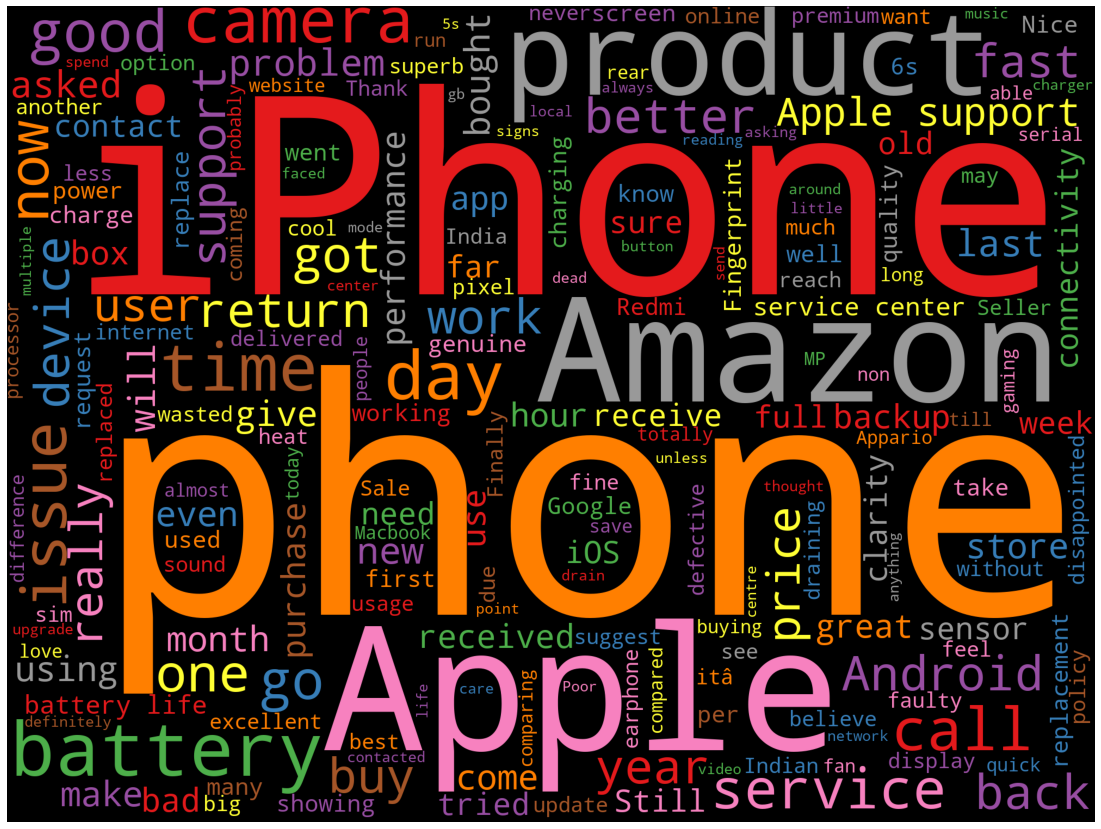

In [64]:
stopwords = STOPWORDS
wordcloud = WordCloud(width =2000, height = 1500,background_color='black',colormap='Set1',stopwords=stopwords).generate(amazon_reviews_wordcloud)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off');

# Visualization of sentiment scores

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


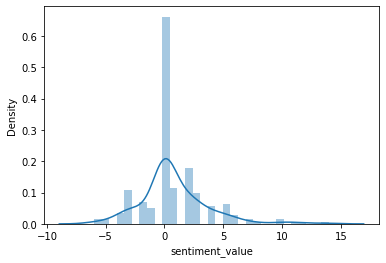

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

#Distribution plot
sns.distplot(sent_df['sentiment_value']);

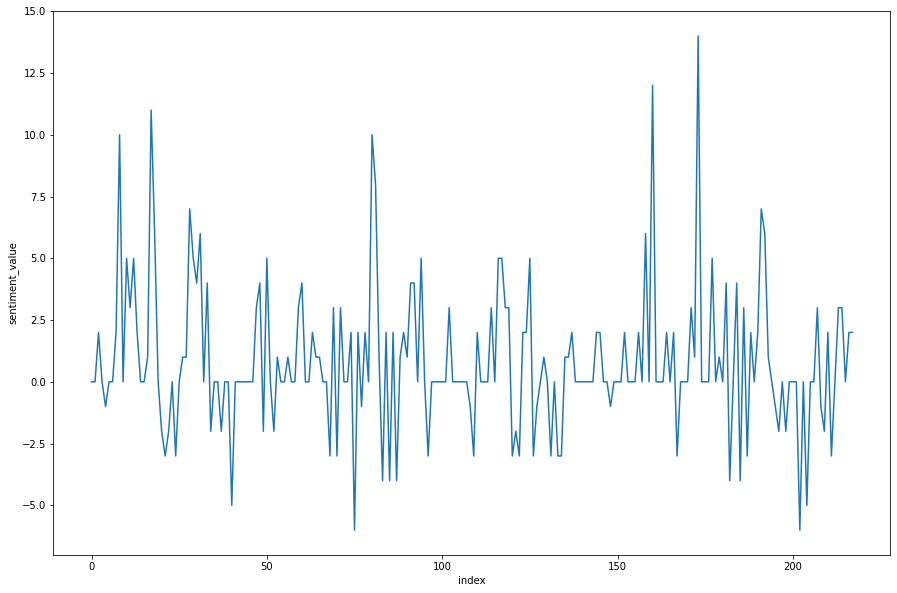

In [40]:
#Line plot
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df);

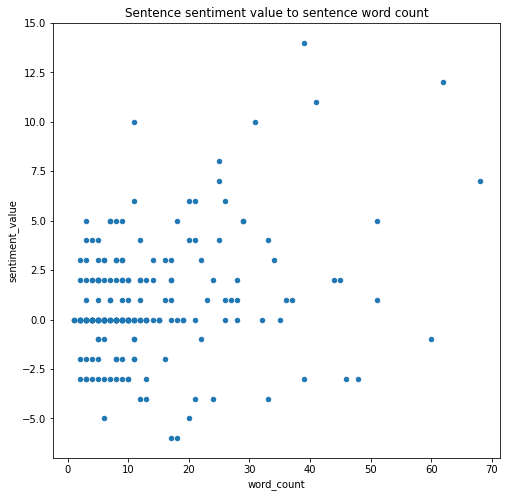

In [41]:
#Scatter plot between 'Sentiment value' and 'word count'
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count');

# **Inference** : Based on above Sentiment analysis, we can conclude that both positive & negative reviews are almost equal, some are having high negative and some are having high positive value, so it is a average kind of product.